In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [ ]:
#baseline model
#first download the data
train_data = datasets.FashionMNIST(root = "data",train=True,
                                   transform = ToTensor(),
                                   download = True,
                                   target_transform = None)

test_data = datasets.FashionMNIST(root = "data",train = False,
                                  transform = ToTensor(), target_transform = None)

In [ ]:
torch.__version__

'2.3.0+cu121'

In [ ]:
img,label = train_data[0]
img,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

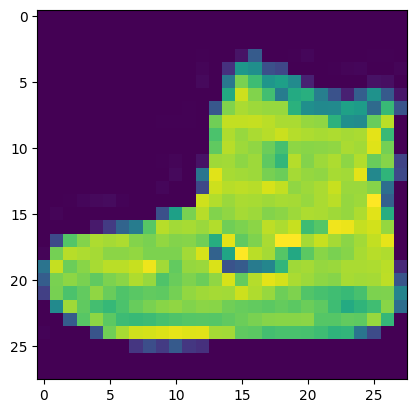

In [ ]:
plt.imshow(img.squeeze())

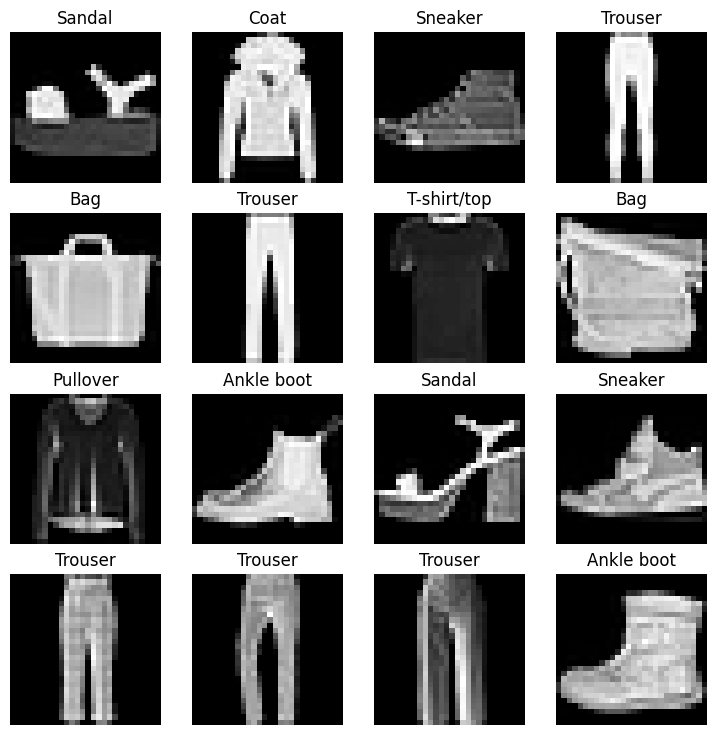

In [ ]:
fig = plt.figure(figsize = (9,9))
rows, columns = 4,4

for i in range(1,rows*columns+1):
  rand_idx = torch.randint(0,len(train_data),size = [1]).item()
  img,label = train_data[rand_idx]
  fig.add_subplot(rows, columns, i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(train_data.classes[label])
  plt.axis(False)

In [ ]:
#prep dataloader
train_dataloader = DataLoader(train_data, batch_size = 32,shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 32, shuffle = False)

In [ ]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [ ]:
flatten_model = nn.Flatten()
x,y = train_data[0]
print(x.shape)
op = flatten_model(x)
print(op.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
#BASELINE MODEL
from torch import nn
x = train_features_batch[0]
s = nn.Flatten()
o  = s(x)
o.shape

torch.Size([1, 784])

In [ ]:
class BaseModel(nn.Module):
  def __init__(self, input_shape :int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer= nn.Sequential(nn.Flatten(),
                              nn.Linear(in_features = input_shape , out_features = hidden_units),
                              nn.ReLU(),
                              nn.Linear(in_features = hidden_units, out_features = output_shape),
                              nn.ReLU()
                              )

  def forward(self, x):
    return self.layer(x)

In [ ]:
model = BaseModel(input_shape = 784,
                  hidden_units = 10,
                  output_shape=len(train_data.classes))
list(model.parameters())

[Parameter containing:
 tensor([[-0.0294, -0.0175,  0.0288,  ...,  0.0310,  0.0002,  0.0099],
         [-0.0160,  0.0265, -0.0120,  ..., -0.0063,  0.0095, -0.0108],
         [ 0.0156, -0.0056, -0.0193,  ...,  0.0062, -0.0002, -0.0289],
         ...,
         [ 0.0335,  0.0248,  0.0349,  ...,  0.0319, -0.0014, -0.0323],
         [ 0.0078, -0.0075, -0.0028,  ..., -0.0064,  0.0025,  0.0288],
         [-0.0266,  0.0286, -0.0205,  ..., -0.0352, -0.0246, -0.0254]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0065,  0.0244, -0.0268, -0.0347,  0.0172, -0.0129, -0.0137,  0.0255,
          0.0357, -0.0330], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0498, -0.1685, -0.1468,  0.0310, -0.3051, -0.0182,  0.2197, -0.1101,
           0.0188, -0.0142],
         [ 0.2594, -0.0110,  0.0076, -0.1061,  0.1471,  0.1767,  0.0053,  0.1426,
          -0.2071,  0.1199],
         [-0.0163,  0.2448,  0.1913, -0.2388, -0.1122, -0.1814,  0.1710, -0.0101,
          -0.1617, -0.1144]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
model = model.to (device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
from helper_functions import accuracy_fn

already exists


In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  train_loss, train_acc = 0,0
  model.to(device)
  model.train()

  for batch,(x,y) in enumerate(data_loader):
    x,y = x.to(device),y.to(device)
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y, y_pred= y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f}| Train accuracy: {train_acc:.2f}")

def test_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, accuracy_fn):
  test_loss, test_acc = 0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for (x,y) in data_loader:
      x,y  = x.to(device), y.to(device)
      test_pred = model(x)
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f}| Test accuracy: {test_acc:.2f}")

NameError: name 'torch' is not defined

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------------------------------")
  train_step(model= model,
             data_loader= train_dataloader,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn)
  test_step(model = model,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn)
end_time = timer()
print_train_time(start = start_time, end = end_time, device = device )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------------------------------
Train loss: 1.08977| Train accuracy: 64.29
Test loss: 1.05182| Test accuracy: 67.10
Epoch: 1
------------------------------------
Train loss: 0.98960| Train accuracy: 68.83
Test loss: 0.99572| Test accuracy: 68.01
Epoch: 2
------------------------------------
Train loss: 0.94124| Train accuracy: 70.59
Test loss: 0.95383| Test accuracy: 69.35
Train time on cpu: 37.728 seconds


37.72843179900019

In [ ]:
!echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [ ]:
!curl --head --silent google.com |grep --ignore-case content-length | cut --delimiter=' ' -f2

219
